Boltzmann Machine is a type of stochastic recurrent neural network introduced by Geoffrey Hinton and Terry Sejnowski in 1985. It is an energy-based model, similar to the Hopfield network. Boltzmann Machines can learn to represent complex probability distributions over their input patterns and can be used for tasks such as pattern recognition, dimensionality reduction, and optimization.

A particular variant, called the Restricted Boltzmann Machine (RBM), has gained popularity due to its more tractable learning algorithm and ability to be stacked to form deep belief networks. In RBMs, neurons are divided into visible and hidden layers, and connections only exist between layers, not within layers.

Here's a simple implementation of a Restricted Boltzmann Machine using Python:

In [2]:
import numpy as np

class RBM:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.weights = 0.1 * np.random.randn(num_visible, num_hidden)
        self.visible_bias = np.zeros(num_visible)
        self.hidden_bias = np.zeros(num_hidden)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, data, learning_rate, num_epochs):
        num_samples = data.shape[0]

        for epoch in range(num_epochs):
            hidden_activations = self.sigmoid(np.dot(data, self.weights) + self.hidden_bias)
            hidden_states = hidden_activations > np.random.rand(num_samples, self.num_hidden)
            visible_reconstructions = self.sigmoid(np.dot(hidden_states, self.weights.T) + self.visible_bias)
            hidden_reconstructions = self.sigmoid(np.dot(visible_reconstructions, self.weights) + self.hidden_bias)

            positive_grad = np.dot(data.T, hidden_activations)
            negative_grad = np.dot(visible_reconstructions.T, hidden_reconstructions)

            self.weights += learning_rate * (positive_grad - negative_grad) / num_samples
            self.visible_bias += learning_rate * np.mean(data - visible_reconstructions, axis=0)
            self.hidden_bias += learning_rate * np.mean(hidden_activations - hidden_reconstructions, axis=0)

    def generate(self, num_samples):
        samples = np.zeros((num_samples, self.num_visible))

        for i in range(num_samples):
            hidden_activations = self.sigmoid(np.dot(samples[i], self.weights) + self.hidden_bias)
            hidden_states = hidden_activations > np.random.rand(self.num_hidden)
            visible_activations = self.sigmoid(np.dot(hidden_states, self.weights.T) + self.visible_bias)
            samples[i] = visible_activations > np.random.rand(self.num_visible)

        return samples


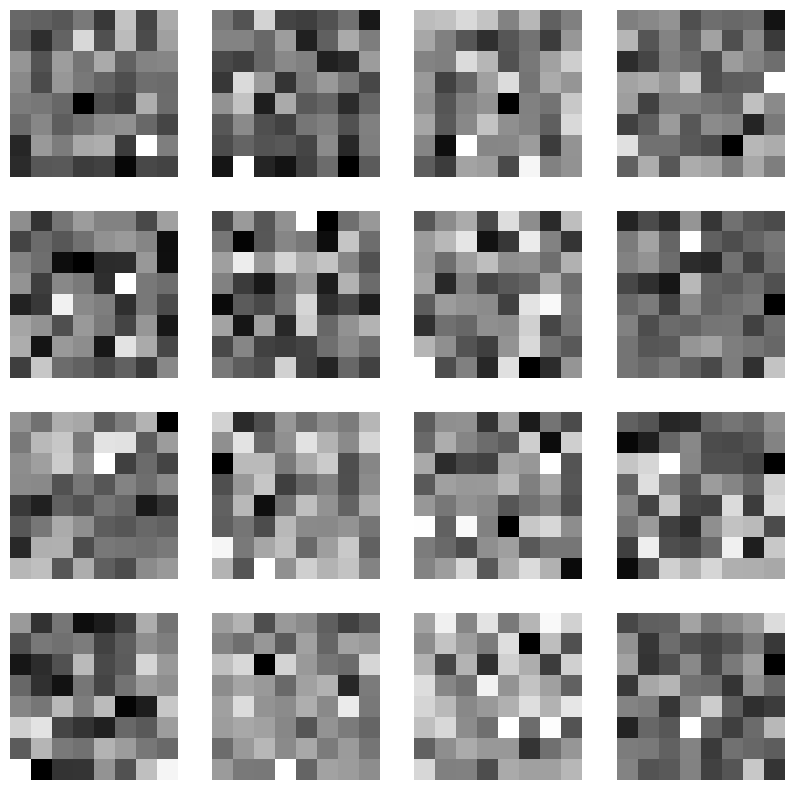

In [3]:
import matplotlib.pyplot as plt

def plot_weights(weights, img_shape, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

    for i, ax in enumerate(axes.flatten()):
        if i < len(weights.T):
            ax.imshow(weights.T[i].reshape(img_shape), cmap="gray")
        ax.axis("off")

    plt.show()

# Create synthetic data for training
data = np.random.rand(100, 64) > 0.5

# Train the RBM
num_visible = data.shape[1]
num_hidden = 16
rbm = RBM(num_visible, num_hidden)
rbm.train(data, learning_rate=0.1, num_epochs=1000)

# Plot the learned weights
plot_weights(rbm.weights, img_shape=(8, 8), num_rows=4, num_cols=4)


This code loads the MNIST dataset, binarizes the pixel values using a threshold of 127, and splits the dataset into training and testing sets. It then trains the RBM on the training set with 100 hidden units and visualizes the learned weights as 28x28 images. You should see patterns that resemble strokes or parts of digits, which the RBM has learned to represent the handwritten digits.

Here's an example of using the previously implemented Restricted Boltzmann Machine (RBM) with the MNIST dataset. We'll train the RBM on a subset of the dataset and then visualize the learned weights. You'll need to install scikit-learn to load the MNIST dataset.

/env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/env/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


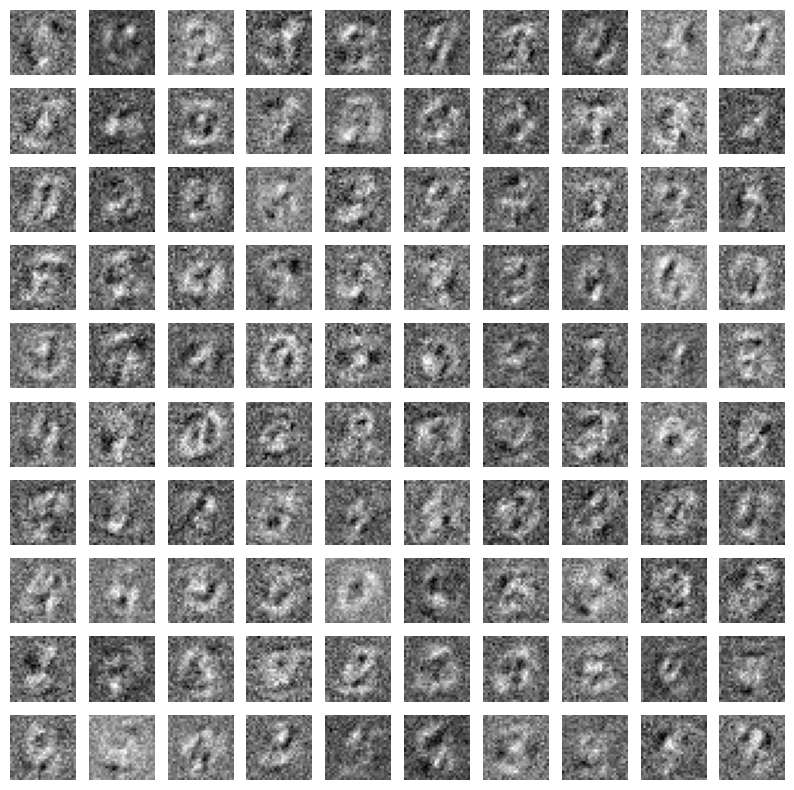

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Binarize the data
binarizer = Binarizer(threshold=127)
X_binary = binarizer.transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Train the RBM
num_visible = X_train.shape[1]
num_hidden = 100
rbm = RBM(num_visible, num_hidden)
rbm.train(X_train, learning_rate=0.1, num_epochs=100)

# Plot the learned weights
plot_weights(rbm.weights, img_shape=(28, 28), num_rows=10, num_cols=10)


This code loads the MNIST dataset, binarizes the pixel values using a threshold of 127, and splits the dataset into training and testing sets. It then trains the RBM on the training set with 100 hidden units and visualizes the learned weights as 28x28 images. You should see patterns that resemble strokes or parts of digits, which the RBM has learned to represent the handwritten digits.

With a trained RBM model, you can perform various tasks, such as:

Feature extraction: The activations of the hidden units can be used as features for downstream tasks like classification, regression, or clustering. By training an RBM, you learn a more compact and potentially more meaningful representation of the input data.

Dimensionality reduction: RBMs can be used to reduce the dimensionality of the input data. The hidden layer activations provide a lower-dimensional representation of the input data, which can be helpful for visualization or to reduce computational complexity in subsequent processing steps.

Pattern generation: RBMs can generate new samples that resemble the training data. By sampling from the learned model, you can generate new data points that have similar statistical properties to the original data. This can be useful for data augmentation or to explore the learned distribution.

Pre-training for deep learning: RBMs can be stacked to form deep belief networks (DBNs), where the hidden layer of one RBM serves as the visible layer for the next RBM in the stack. By pre-training each layer with an RBM, you can initialize the weights of a deep neural network in a more meaningful way, which can lead to better performance and faster convergence during fine-tuning with supervised learning.

Collaborative filtering and recommendation: RBMs can be used for collaborative filtering tasks, such as recommending items to users based on their preferences. In this context, the visible layer represents user-item interactions (e.g., movie ratings), and the hidden layer captures latent factors that explain these interactions. By learning these latent factors, RBMs can predict user preferences for unseen items and provide personalized recommendations.

Keep in mind that the performance of RBMs may be limited compared to more modern deep learning techniques, such as convolutional neural networks (CNNs) or transformers, especially for complex tasks or large-scale data. However, they can still be useful for simpler tasks or as a building block in more complex models.